# Importing Libraries
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings                                                                 
warnings.filterwarnings('ignore') 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Loading the data into dataset 

In [2]:
df = pd.read_csv("avocado.csv")

# Checking first five data of dataframe

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Drop the column unnamed

In [4]:
df.drop("Unnamed: 0", axis=1,inplace=True)

no of rows and column in dataset

In [5]:
df.shape

(18249, 13)

coloumn and their data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


checking the null value

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Checking value count of categorical data

In [8]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

There are two type of avacado one is conventional and other is organic avacado

In [9]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

There are 4 different year i.e. 2015,2016,2017,2018

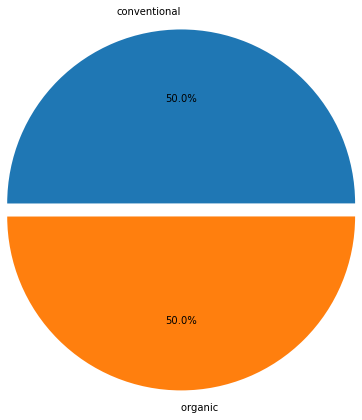

In [10]:
r = df.groupby('type')['type'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['conventional', 'organic  '], radius=2.0, autopct='%1.1f%%',  shadow=False);

We can clearly see that there half proproption of organic and conventional avacado

<AxesSubplot:xlabel='year', ylabel='count'>

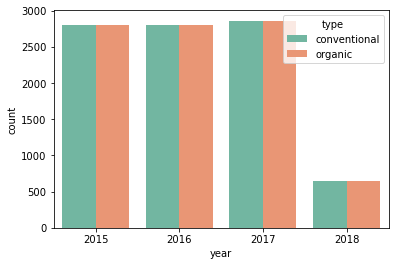

In [11]:
sns.countplot(x='year',palette = "Set2", hue='type', data=df)

Here we can see total avacado sales in different year

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

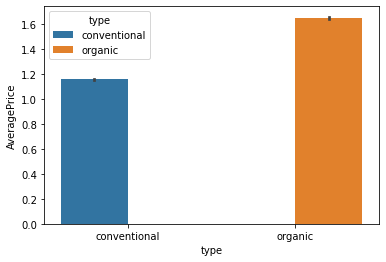

In [12]:
import seaborn as sns 
sns.barplot(x='type',y='AveragePrice',hue='type',data=df)

Here we can clearly see that that the avg. price of organic avacado is more than the conventional avacado

# sats about the data

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Plot the co-relation between the dataset

<AxesSubplot:>

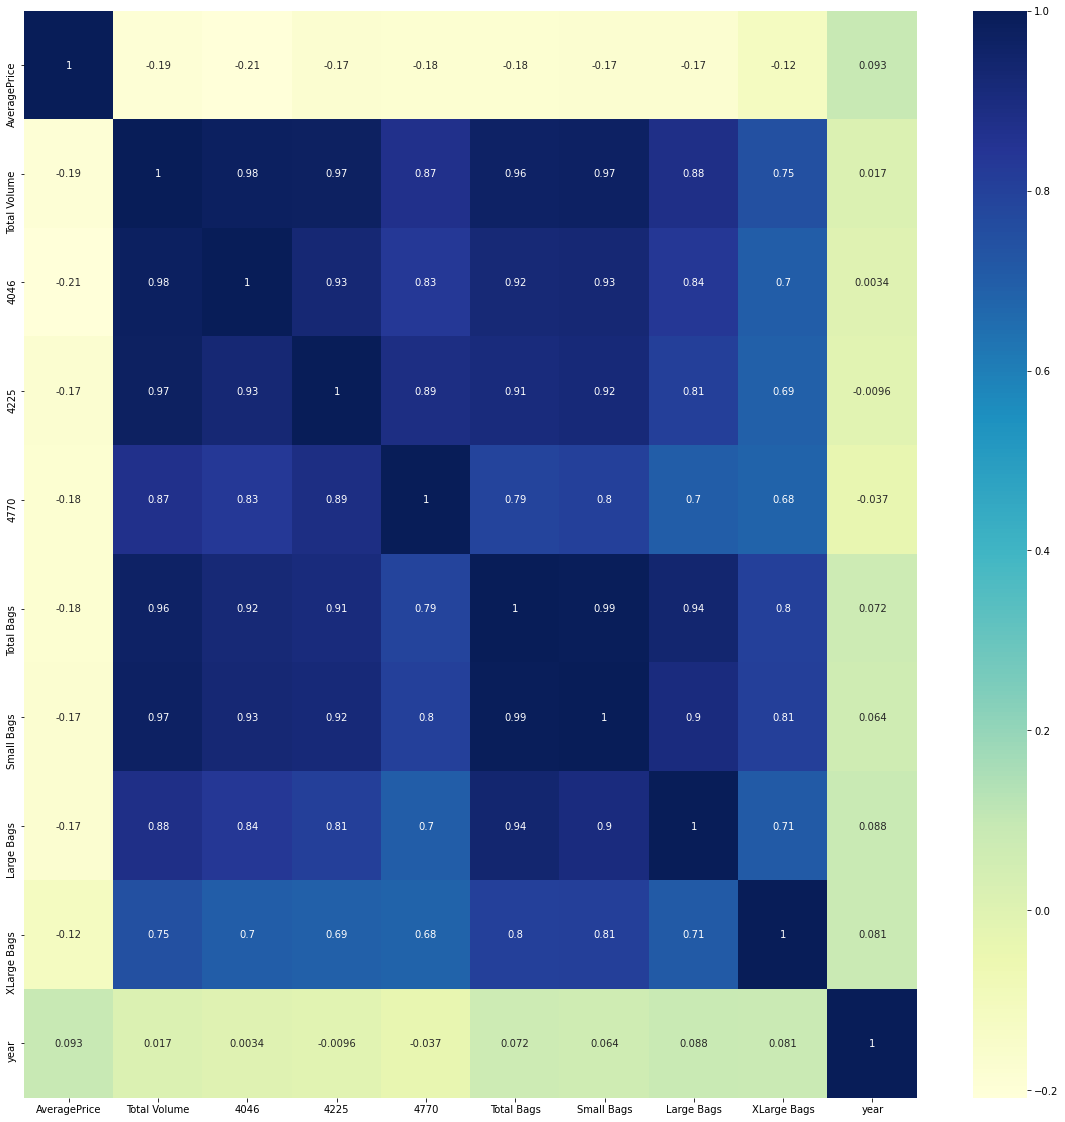

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Hewe, we We can see there is a strong relation between TotalBags and TotalVolume ie, 0.96

<AxesSubplot:xlabel='4046', ylabel='Total Volume'>

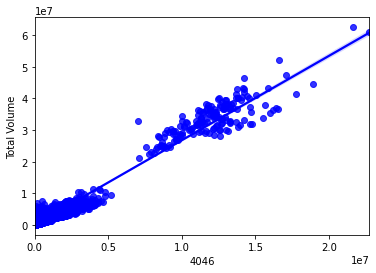

In [15]:
sns.regplot(x='4046',y='Total Volume',data=df , color = "b")

There is a strong co-relation between TotalVolume Vs 4046

<AxesSubplot:xlabel='4225', ylabel='Total Volume'>

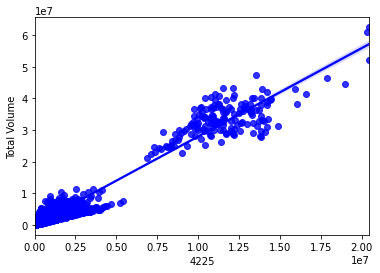

In [16]:
sns.regplot(x='4225',y='Total Volume',data=df , color = "b")

  There is co- relation between Total volume and 4225,  

<AxesSubplot:xlabel='4770', ylabel='Total Volume'>

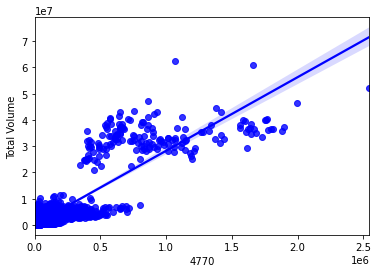

In [17]:
sns.regplot(x='4770',y='Total Volume',data=df , color = "b")

There is weak co-relation between Total volume and 4770, 

<AxesSubplot:xlabel='Small Bags', ylabel='Total Bags'>

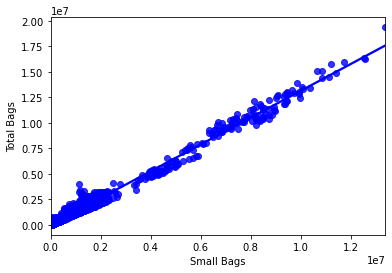

In [18]:
sns.regplot(x='Small Bags',y='Total Bags',data=df , color = "b")

There is a strong co-relation between Total bags and small bags

<AxesSubplot:xlabel='Large Bags', ylabel='Total Bags'>

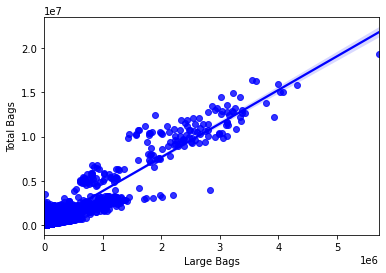

In [19]:
sns.regplot(x='Large Bags',y='Total Bags',data=df , color = "b")

There is co- relation between Total bags and large bag

<AxesSubplot:xlabel='XLarge Bags', ylabel='Total Bags'>

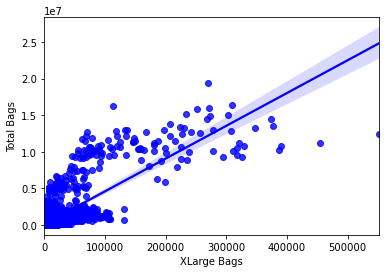

In [20]:
sns.regplot(x='XLarge Bags',y='Total Bags',data=df , color = "b")

 There is weak co-relation between total bag and xlarge bag,

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

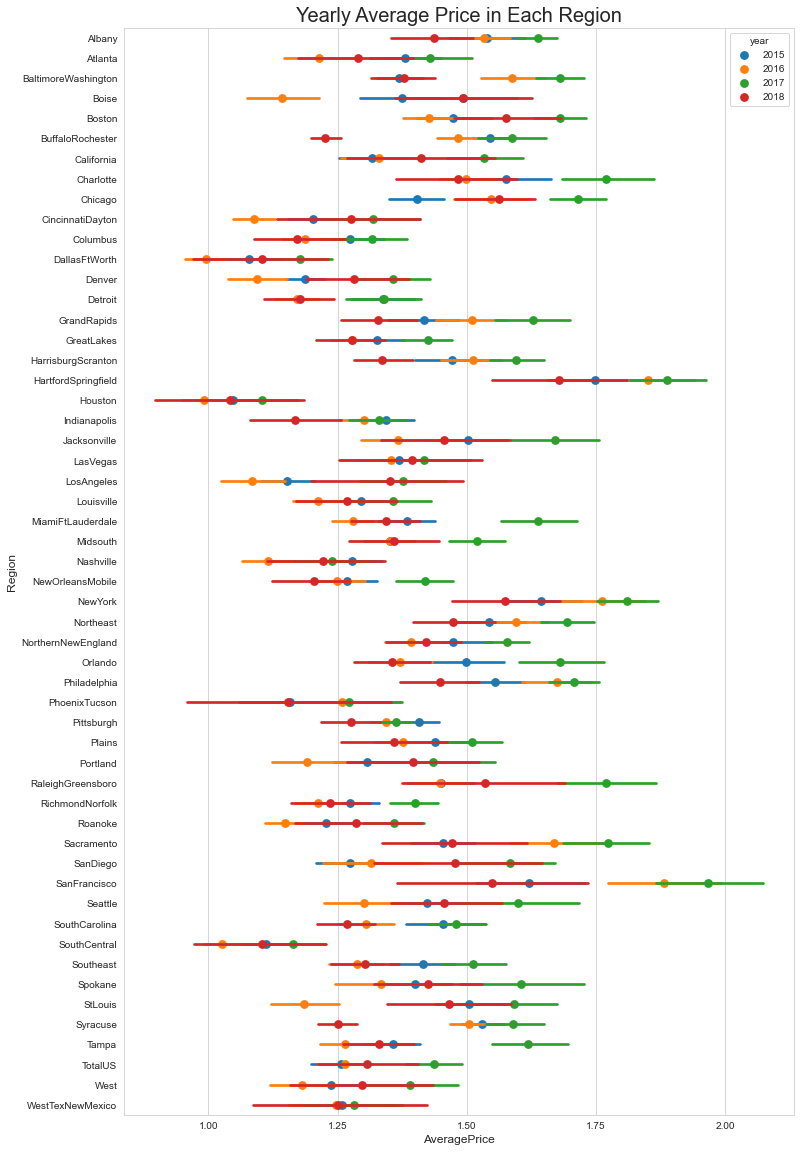

In [21]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('AveragePrice',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

From the following plot we can clearly say that the avg price high in year 2017  and among all the region  sans fransciso

Text(0.5, 1.0, 'Type Average Price in Each Region')

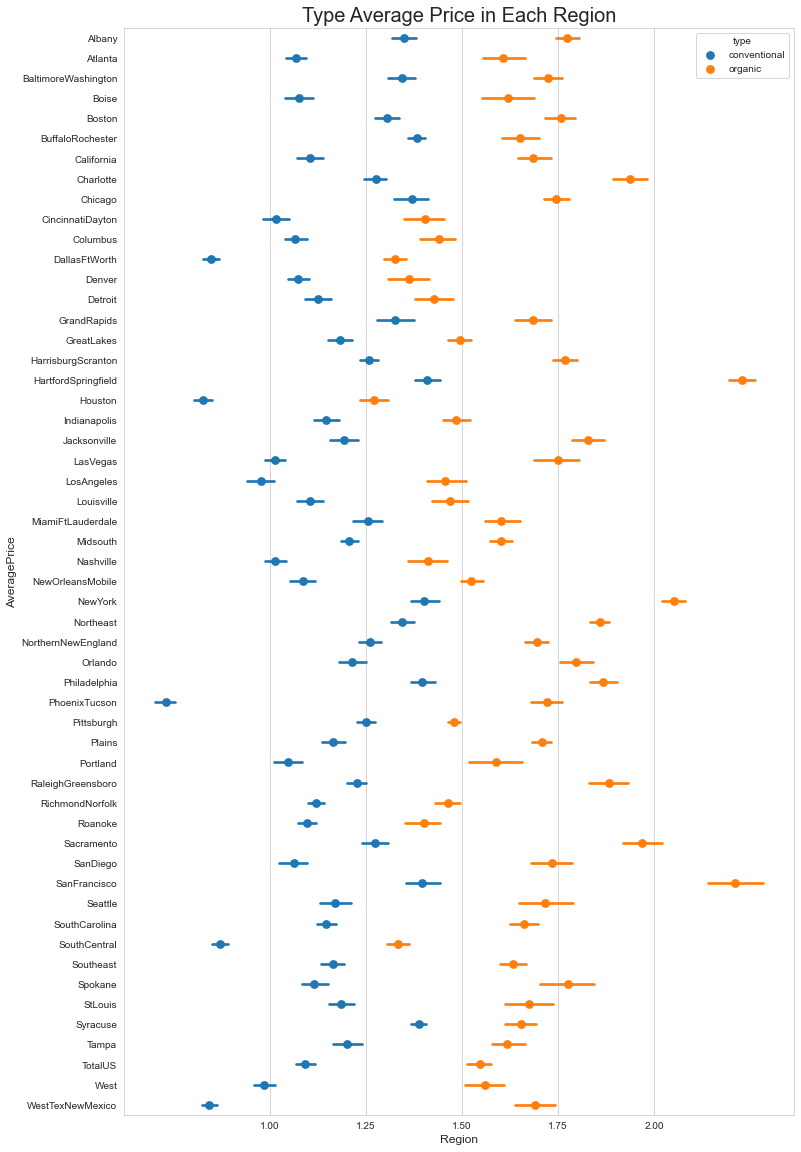

In [22]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

from the following polt we can say that the avg price of oranic is much higher than convenctional

In [23]:
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type)

In [24]:
#feature columns
X=df[['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']] 
#predictor variable
y=df.type

#  split the data into train and split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Model training

In [26]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),y_test)))

Train Accuracy : 0.75 %
Test Accuracy : 0.74 %


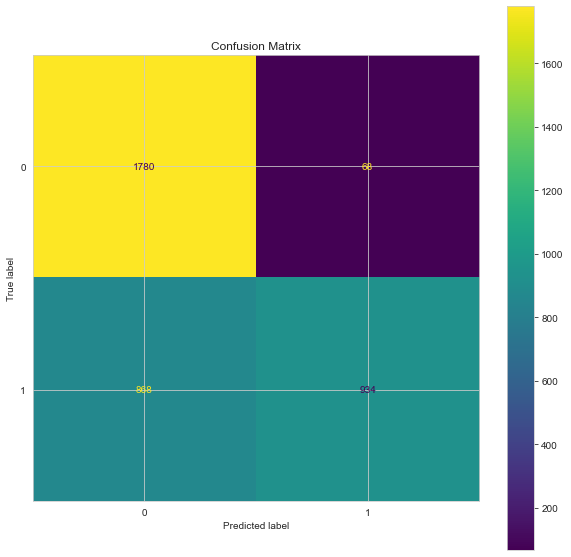

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [28]:
random_forest = RandomForestClassifier(random_state=0).fit(X_train,y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),y_test)))

Train Accuracy : 1.00 %
Test Accuracy : 1.00 %


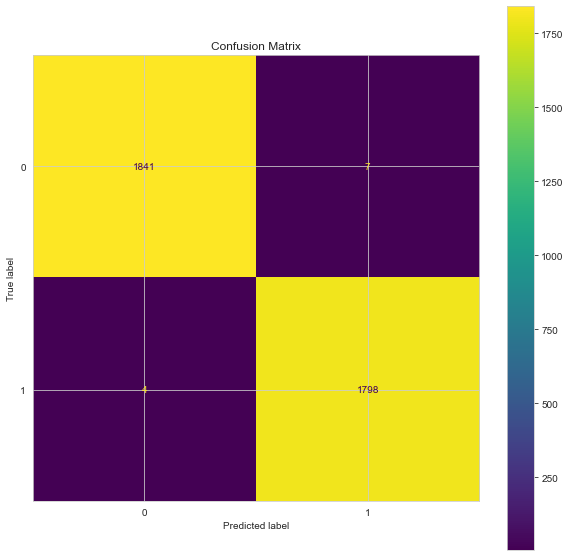

In [29]:
cm = confusion_matrix(y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [30]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.01,use_label_encoder=False,random_state=0).fit(X_train,y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train),y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_test),y_test)))

[22:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy : 0.98 %
Test Accuracy : 0.98 %


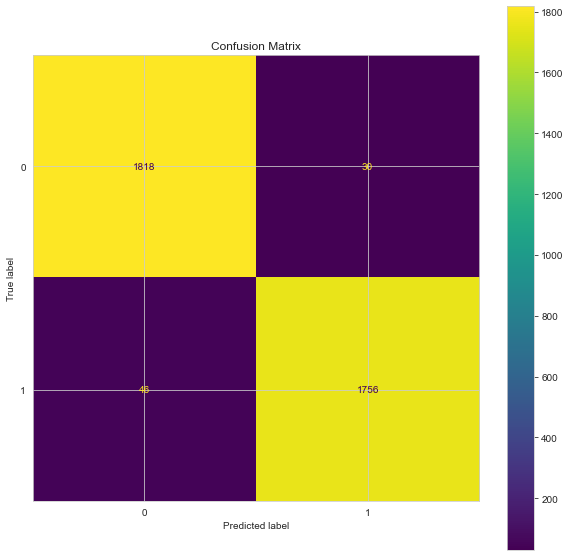

In [31]:
cm = confusion_matrix(y_test,model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [32]:
y_pred_train = logistic_model.predict(X_train)

In [33]:
y_pred_test = logistic_model.predict(X_test)

In [34]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.2496061374066717
MAE for test set is 0.25643835616438354
----------------------------------------------------------------------------------------
MSE for training set is 0.2496061374066717
MSE for test set is 0.25643835616438354
----------------------------------------------------------------------------------------
RMSE for training set is 0.4996059821566108
RMSE for test set is 0.5063974290657325


# Conclusion: Random forest is the best model it gives great accuracy  